# Decision Trees
## Theory
The **decision** (or **growing**) **trees** are *white box* models, which can be implemented in sklearn, with only two children at each row, i.e., *binary models*, using the ***Classification and Regression Tree (CART)*** algorithm, as distinct from more general algorithms, e.g. ID3. As finding the optimal tree is an ***NP-Complete*** problem, requiring $O(exp(m))$ time, which is *intractable* for most of datasets, the CART algorithm greedily search for a locally optimal choice, decides without checking the other impurity of the children nodes, to approximate the global solution with typically *reasonable* but not ideal accuracy similar to the other ***greedy algorithms***.

Note that in the theory of *computational complexity* P is the set of problems solvable quickly (in polynomial time as district from inefficient exponential time). NP (i.e., *nondeterministic polynomial time*) is the set of problems whose solutions are verifiable quickly without a specified rule for the guess (nondeterministic) and if its problems can be reduced (transformed) to another NP problem quickly, it is called an NP-Hard problem, which are *intractable*, e.g. `max()` to `sort()`. A problem is NP-Complete if it is both NP and NP-Hard, which is the hardest type, but interestingly if one of the NP-Complete problems is solvable quickly, the others can also be solved likewise. Seemingly, P ≠ NP, and then, no polynomial algorithm exists for the NP-complete problems, but generally it is still an open problem.

Accordingly, decision trees iteratively splits the training set into two subsets via the feature $k$ and its threshold $t_k$ and finds the purest subset weighted by their size. For regression use:

\begin{equation}
J\left(k,t_k\right)=\frac{m_{\text{left}}}{m}{\text{MSE}}_{\text{left}}+\frac{m_{\text{right}}}{m}{\text{MSE}}_{\text{right}}
\end{equation}

Where $m_{\text{left}}$ or $m_{\text{right}}$ are number of instances on each side, and

\begin{equation}
\text{MSE}=\sum_{i\in node}\left({\hat{y}}_{node}-y^{\left(i\right)}\right)^2,\ \ \ \ \ \ \ \ \ \ {\hat{y}}_{node}=\frac{1}{m_{node}}\ \sum_{i\in node} y^{\left(i\right)}
\end{equation}

And for the classification, it becomes

\begin{equation}
J\left(k,t_k\right)=\frac{m_{\text{left}}}{m}G_{\mathbf{left}}+\frac{m_{\text{right}}}{m}G_{\mathbf{right}}
\end{equation}

$G$ is impurity. Generally, the Gini impurity is used by

\begin{equation}
G_i=1-\sum_{k=1}^{\mathit{n}}P_{i,k}^2
\end{equation}

Where $P_{i,k}$  is the ratio of the class $k$ instances within instances in the ith node. For example:

<img src="img/z1.png" width="300px">
<center>Iris Decision Tree</center>

Here, the model starts at the ***root node (depth 0)***, the moves the root’s child node, which if do not have a child it is called a **leaf node**. Generally, the gini score (between 0 to 1), measuring the **impurity**, and for a ***pure node*** it is $0$. E.g. this score for the depth-2 left node is $1-{(0/54)}^2\ – (49/54)2-(5/54)2 ≈ 0.168$. For regression, the MSE is shown instead of the gini score.

Alternatively, instead of the gini impurity, the entropy  measure can be used through the binary logarithm:

\begin{equation}
H_i=-\sum_{\begin{matrix}k=\mathbf{1}\\\ P_{i,k}^\ \neq0\\\end{matrix}}^{\mathit{n}}{P_{i,k}^\ \log_2^\ \left(P_{i,k}^\ \right)}
\end{equation}

Note taht in Shannon’s information theory, an *entropy reduction* is called an information gain as this parameter measures the average information content of a message with zero value for the case of all identical.

In ML, *zero entropy* in a set means that it contains instances with just one class. Comparatively, *gini impurity*, which is slightly faster, produces similar results but tends to isolate the most frequent class in its branch while entropy produces slightly more balanced trees

### Regularization and instability
Decision trees does require little data preparation, such as, feature scaling and centering at all. They make very few assumptions and if left unconstrained, are prone to overfitting in contrary the linear models that assumes linearity of the dataset and can easily underfit. Therefore, although decision trees have may parameters, they are called ***nonparametric*** as the DOF are not predetermined, as opposed to the parametric model.

As they are mostly balanced, prediction is fast even in large dataset as it can traverse from the root to a leaf by going through $O(\log_2^\ \left(m\right))$ nodes. The training, however, requires $O(n\times m\ \log_2^\ \left(m\right))$, as at each node, the algorithm compares all the samples and features. For until few thousand instances, data can be presorted by `presort=True` but for larger datasets, it can slow down the training.

For regularization, typically increase `min_*` or decrease `max_*` hyperparameters. Most importantly, reduce `max_depth`. Other examples are `max_features` referring to the number of features needed for splitting at nodes, `min_samples_split` corresponding to the number of samples before splitting. min_samples_leaf and `min_weight_fraction_leaf` both refer to the number of samples, but the latter includes the `sample_weight` of samples, if specified.

<img src="img/z2.png" width="450px">
<center>Regularization example.</center>

Alternatively, the unnecessary nodes that have only leaf children nodes can be ***pruned*** (deleted) by if their *p-values* are (typically) more than 5%. Such probability values are only the result of chance (***null hypothesis***) and therefore *not statistically significant*, which are measurable by a statistical test, such as $\chi^2$ (***chi-squared***) test. Sklearn implements a similar method, i.e., ***cost complexity pruning***, to control the size of trees by ***complexity parameter*** `ccp_alpha`.

Note that according to Wikipedia, $\chi^2$-distribution is special case of Gamma distribution, formed by summation of the squares of k independent standard normal random variables.

Finally, `random_state` hyperparameter can be used as Decision Tree algorithms in sklearn is *stochastic*. Also, they are very sensitive to any variations in the training data. In particular, as they split the space perpendicular to the axes, characterized by the ***orthogonal decision boundaries***, they are sensitive to training set rotation, which may be addressed by the ***principal component analysis (PCA)***. But as a more general solution to the results’ instability, **Random Forests** can be implemented.

## Implementation
For classification, `DecisionTreeClassifier()` to fit the model.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y);

Saving figure decision_tree_decision_boundaries_plot


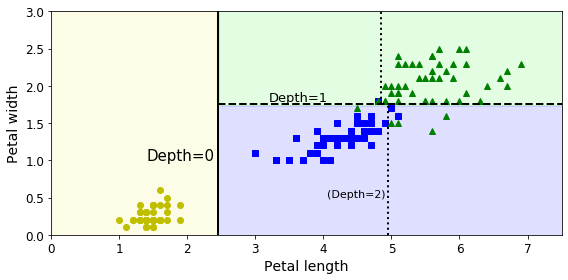

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

-----------
The probability, which is $P_{i,k}$  at each leaf node, is accessible by `.predict_proba()`.

In [11]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [12]:
tree_clf.predict([[5, 1.5]])

array([1])

----------
The results can be visualized by export_graphviz() and displayed in Jupyter by first installing graphviz and adding it into the path then applying Source.from_file(). The created .dot file is also convertible by a command line. 

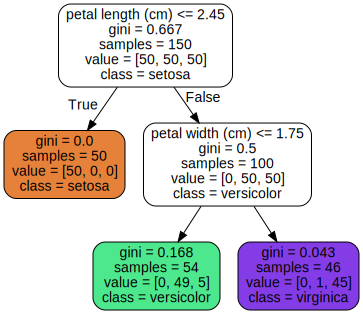

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

NEW_IMAGE = os.path.join(IMAGES_PATH, "iris_tree.dot")
Source.from_file(NEW_IMAGE)

In [9]:
# for PNG saving:
from subprocess import check_call
PNG_ADDRESS = os.path.join(IMAGES_PATH, "iris_tree.png")
check_call(['dot','-Tpng',NEW_IMAGE,'-o',PNG_ADDRESS]);

------------
Likewise, `DecisionTreeRegressor()` can be applied for regression. Finally, if needed, `criterion="entropy"`, along with the other hyperparameters may be considered.

In [13]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

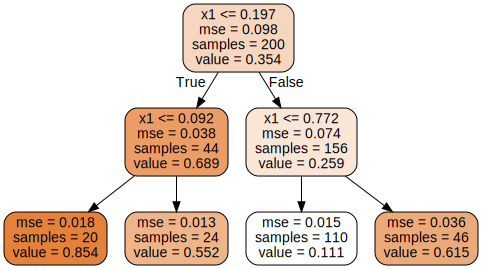

In [16]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))